In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy.stats import randint, uniform
import xgboost as xgb
from sklearn.model_selection import  RandomizedSearchCV, StratifiedKFold



In [42]:
# Load the datasets
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')




# Get the number of rows and columns for each DataFrame
rows_columns_X_train = X_train.shape
rows_columns_y_train = y_train.shape

# Output the number of rows and columns
print(f"X_train rows, columns: {rows_columns_X_train}")
print(f"y_train rows, columns: {rows_columns_y_train}")

X_train rows, columns: (10229, 26)
y_train rows, columns: (10229, 3)


In [43]:
# Merge the DataFrames on 'Identifiant'
df = pd.merge(X_train, y_train, on='Identifiant')
df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y','Identifiant','Insee'], inplace=True)
df['EXPO'] = df['EXPO'].apply(lambda x: float(str(x).replace(',', '.')))
df['ft_24_categ'] = df['ft_24_categ'].str.strip()
df['ft_24_categ'] = df['ft_24_categ'].replace('.', np.nan)
df.drop('ft_24_categ', axis=1, inplace=True)
df.to_csv('merged_data.csv', index=False)

In [44]:
target = 'target'
labels = ['Claimed','Not Claimed']
features = [i for i in df.columns.values if i not in [ target]]


In [45]:
original_df = df.copy(deep=True)
display(df.head())
print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,target
0,2014,1.000000,0,V,N,1,O,1,O,N,...,AUTRE,IDENTIQUE,V,base,2,1351.0,4,2012.0,0.0,0
1,2014,1.000000,0,V,V,V,V,V,V,V,...,V,V,N,base,2,1972.0,2,1980.0,0.0,1
2,2013,1.000000,1,V,V,V,V,V,V,V,...,V,V,N,base,2,1630.0,4,NaN,0.0,0
3,2013,0.246575,0,N,V,V,V,V,V,V,...,V,V,N,base,2,532.0,3,NaN,0.0,0
4,2015,1.000000,0,V,N,2,O,1,O,N,...,AUTRE,IDENTIQUE,V,base,2,1050.0,2,1972.0,0.0,0



Inference: The Dataset consists of 23 features & 10229 samples.


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ft_2_categ   10229 non-null  int32  
 1   EXPO         10229 non-null  float64
 2   ft_4_categ   10229 non-null  int32  
 3   ft_5_categ   10229 non-null  int32  
 4   ft_6_categ   10229 non-null  int32  
 5   ft_7_categ   10229 non-null  int32  
 6   ft_8_categ   10229 non-null  int32  
 7   ft_9_categ   10229 non-null  int32  
 8   ft_10_categ  10229 non-null  int32  
 9   ft_11_categ  10229 non-null  int32  
 10  ft_12_categ  10229 non-null  int32  
 11  ft_13_categ  10229 non-null  int32  
 12  ft_14_categ  10229 non-null  int32  
 13  ft_15_categ  10229 non-null  int32  
 14  ft_16_categ  10229 non-null  int32  
 15  ft_17_categ  10229 non-null  int32  
 16  ft_18_categ  10229 non-null  int32  
 17  ft_19_categ  10229 non-null  int32  
 18  superficief  10110 non-null  float64
 19  ft_2

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ft_19_categ'] = le.fit_transform(df['ft_19_categ'].astype(str))
df['ft_15_categ'] = le.fit_transform(df['ft_15_categ'].astype(str))
df['ft_16_categ'] = le.fit_transform(df['ft_16_categ'].astype(str))
df['ft_18_categ'] = le.fit_transform(df['ft_18_categ'].astype(str))
df['ft_13_categ'] = le.fit_transform(df['ft_13_categ'].astype(str))
df['ft_14_categ'] = le.fit_transform(df['ft_14_categ'].astype(str))
df['ft_17_categ'] = le.fit_transform(df['ft_17_categ'].astype(str))
df['ft_21_categ'] = le.fit_transform(df['ft_21_categ'].astype(str))
df['ft_5_categ'] = le.fit_transform(df['ft_5_categ'].astype(str))
df['ft_6_categ'] = le.fit_transform(df['ft_6_categ'].astype(str))
df['ft_7_categ'] = le.fit_transform(df['ft_7_categ'].astype(str))
df['ft_8_categ'] = le.fit_transform(df['ft_8_categ'].astype(str))
df['ft_9_categ'] = le.fit_transform(df['ft_9_categ'].astype(str))
df['ft_10_categ'] = le.fit_transform(df['ft_10_categ'].astype(str))
df['ft_11_categ'] = le.fit_transform(df['ft_11_categ'].astype(str))
df['ft_12_categ'] = le.fit_transform(df['ft_12_categ'].astype(str))
df['ft_2_categ'] = le.fit_transform(df['ft_2_categ'].astype(str))
df['ft_4_categ'] = le.fit_transform(df['ft_4_categ'].astype(str))
df['ft_21_categ'] = le.fit_transform(df['ft_21_categ'].astype(str))


# Handling NaN values by imputation
imputer = SimpleImputer(strategy='median')  # Imputing with median
df['ft_22_categ'] = imputer.fit_transform(df[['ft_22_categ']].astype(str))


In [60]:
import pandas as pd


smoothing = 10

mean_target_global = df['target'].mean()

agg = df.groupby('ft_23_categ')['target'].agg(['count', 'mean'])
agg.rename(columns={'count': 'n_category', 'mean': 'mean_target_category'}, inplace=True)


agg['smoothed_mean'] = (agg['mean_target_category'] * agg['n_category'] + mean_target_global * smoothing) / (agg['n_category'] + smoothing)


df['ft_23_categ'] = df['ft_23_categ'].map(agg['smoothed_mean'])
df['ft_23_categ'] = pd.to_numeric(df['ft_23_categ'], errors='coerce')



In [49]:
df.head()


,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,target
0,2,1.000000,0,2,0,0,1,0,1,0,...,0,0,2,1,1,1351.0,3,2012.0,0.229512872748403,0
1,2,1.000000,0,2,2,3,2,3,2,2,...,1,1,0,1,1,1972.0,1,1980.0,0.229512872748403,1
2,1,1.000000,1,2,2,3,2,3,2,2,...,1,1,0,1,1,1630.0,3,1970.0,0.229512872748403,0
3,1,0.246575,0,0,2,3,2,3,2,2,...,1,1,0,1,1,532.0,2,1970.0,0.229512872748403,0
4,3,1.000000,0,2,0,1,1,0,1,0,...,0,0,2,1,1,1050.0,1,1972.0,0.229512872748403,0


In [50]:
#Checking the stats of all the columns

display(df.describe())

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,target
count,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,...,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10110.000000,10229.000000,10229.000000,10229.000000
mean,1.646789,0.913672,0.281064,1.381464,1.132369,1.872617,1.565060,1.699286,1.564083,1.132564,...,1.173135,0.566038,0.566038,0.910255,1.451657,0.938508,1818.152918,1.238049,1965.658422,0.227002
std,1.380660,0.233806,0.449540,0.922788,0.991200,1.361340,0.497938,1.486249,0.500024,0.990976,...,0.963875,0.495644,0.495644,0.993310,1.017031,0.240242,2272.111284,0.961589,31.497442,0.418914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1545.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,500.000000,1.000000,1960.000000,0.000000
50%,1.000000,1.000000,0.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1002.000000,1.000000,1970.000000,0.000000
75%,3.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2190.000000,2.000000,1980.000000,0.000000
max,4.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,4.000000,1.000000,30745.000000,3.000000,2016.000000,1.000000


In [51]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

target            2
ft_19_categ       2
ft_4_categ        2
ft_16_categ       2
ft_15_categ       2
ft_17_categ       3
ft_14_categ       3
ft_12_categ       3
ft_11_categ       3
ft_13_categ       3
ft_8_categ        3
ft_6_categ        3
ft_5_categ        3
ft_10_categ       3
ft_9_categ        4
ft_7_categ        4
ft_21_categ       4
ft_18_categ       5
ft_2_categ        5
ft_23_categ       7
ft_22_categ     139
EXPO            467
superficief    2463
dtype: int64

In [52]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 3 numerical & 19 categorical features.


In [53]:
# Print the names of the numerical columns
print("Numerical columns:", nf)

Numerical columns: ['ft_22_categ', 'EXPO', 'superficief']


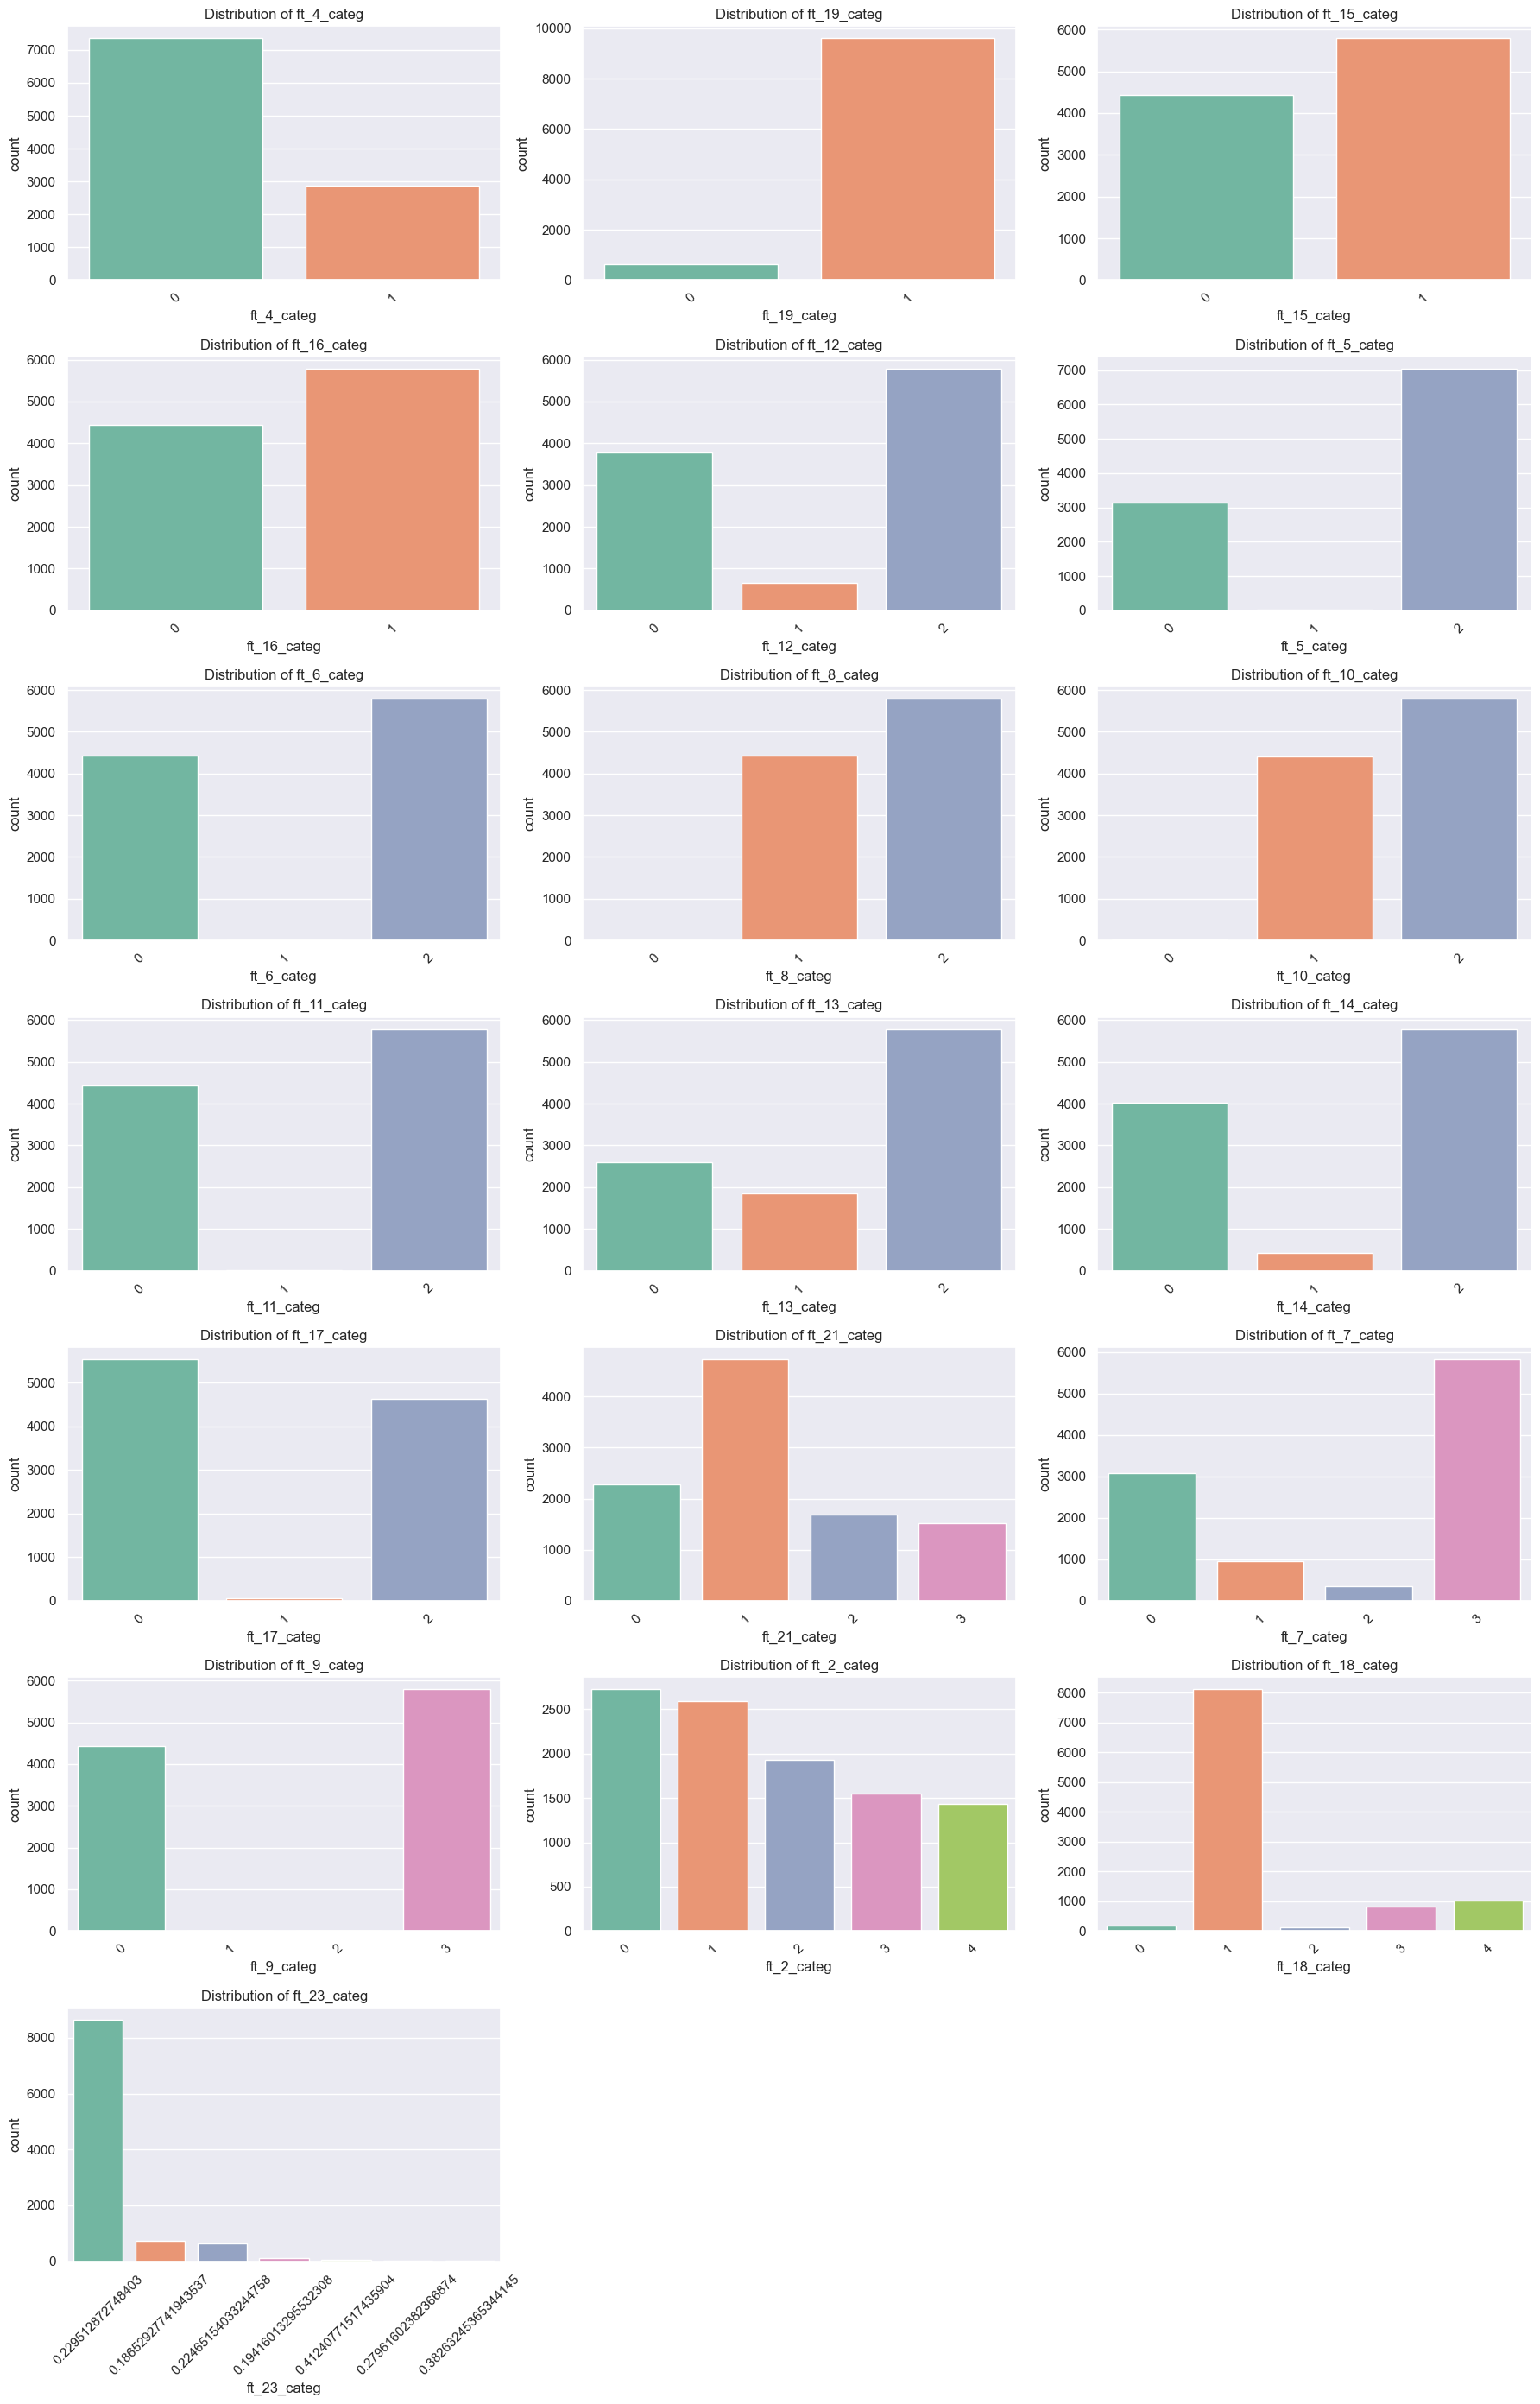

In [54]:

# Set the number of plots per row
plots_per_row = 3  # Adjust based on your preference and screen size

# Calculate the required number of rows to accommodate all categorical features
num_rows = len(cf) // plots_per_row + (len(cf) % plots_per_row > 0)

# Set the overall figure size
plt.figure(figsize=(18, num_rows * 4))  # Width, Height - adjust as needed

# Loop through the list of categorical features to create subplots
for i, feature in enumerate(cf):
    plt.subplot(num_rows, plots_per_row, i + 1)  # Rows, Columns, Plot number
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)  # Rotate the labels to avoid overlap

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

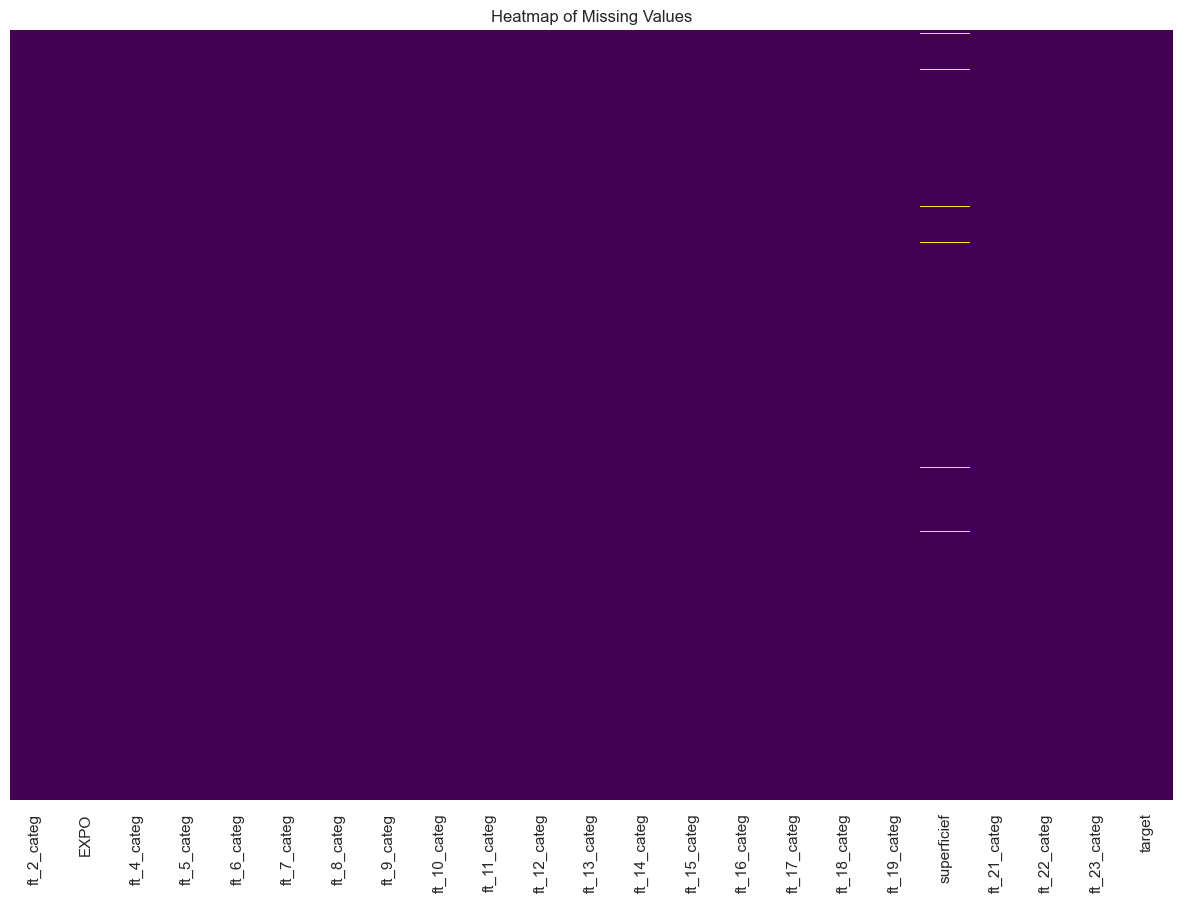

In [55]:


# Calculate a boolean DataFrame where True represents missing values
missing = df.isnull()

# Create a heatmap to visualize the missing values
plt.figure(figsize=(15, 10))  # Adjust the figure size as necessary
sns.heatmap(missing, cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()


In [56]:
# Drop rows where either 'Insee' or 'superficie' column has NaN values
df.dropna(subset=['Insee', 'superficief'], inplace=True)


KeyError: ['Insee']

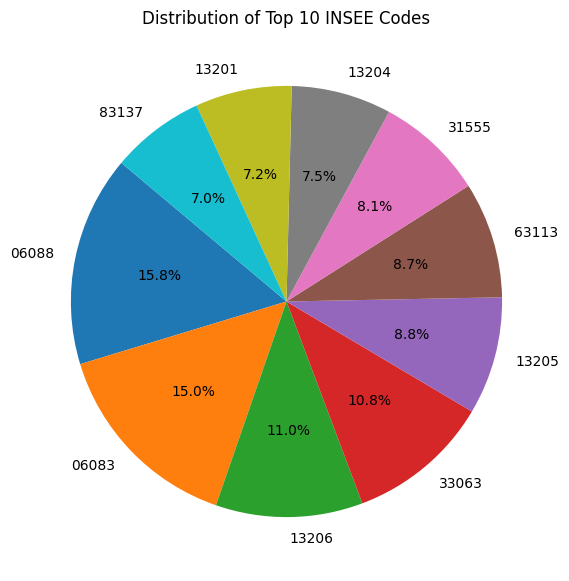

In [ ]:
insee_counts = df['Insee'].value_counts()
top_10_insee_counts = insee_counts.head(10)
plt.figure(figsize=(10, 7)) 
plt.pie(top_10_insee_counts, labels=top_10_insee_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 INSEE Codes')
plt.show()



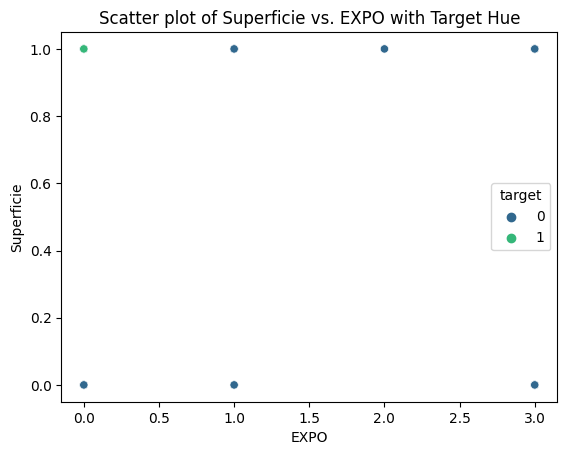

In [ ]:
sns.scatterplot(data=df, x='ft_9_categ', y='ft_19_categ', hue='target', palette='viridis')

plt.title('Scatter plot of Superficie vs. EXPO with Target Hue')
plt.xlabel('EXPO')
plt.ylabel('Superficie')
plt.legend(title='target')
plt.show()

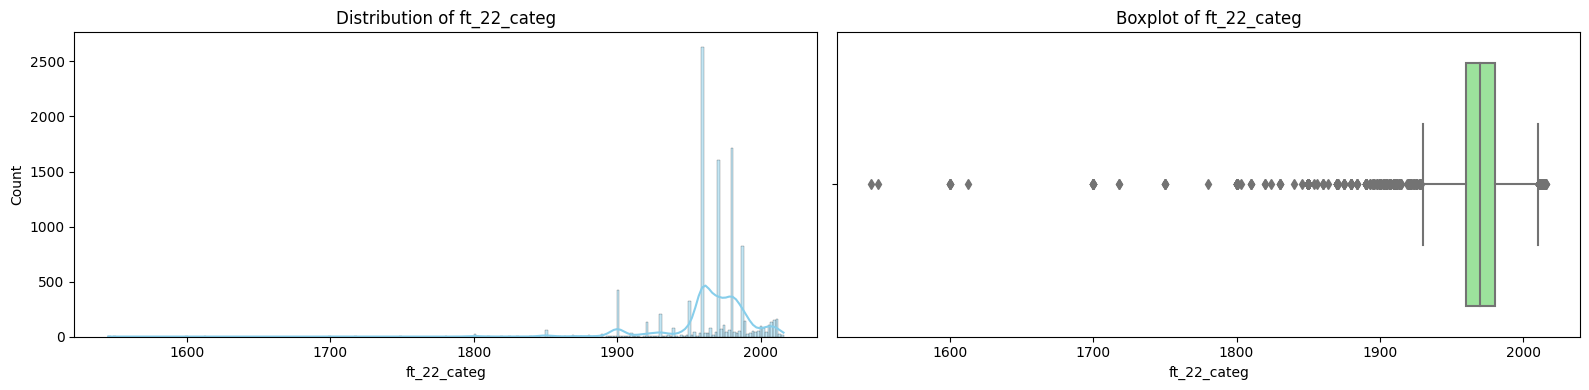

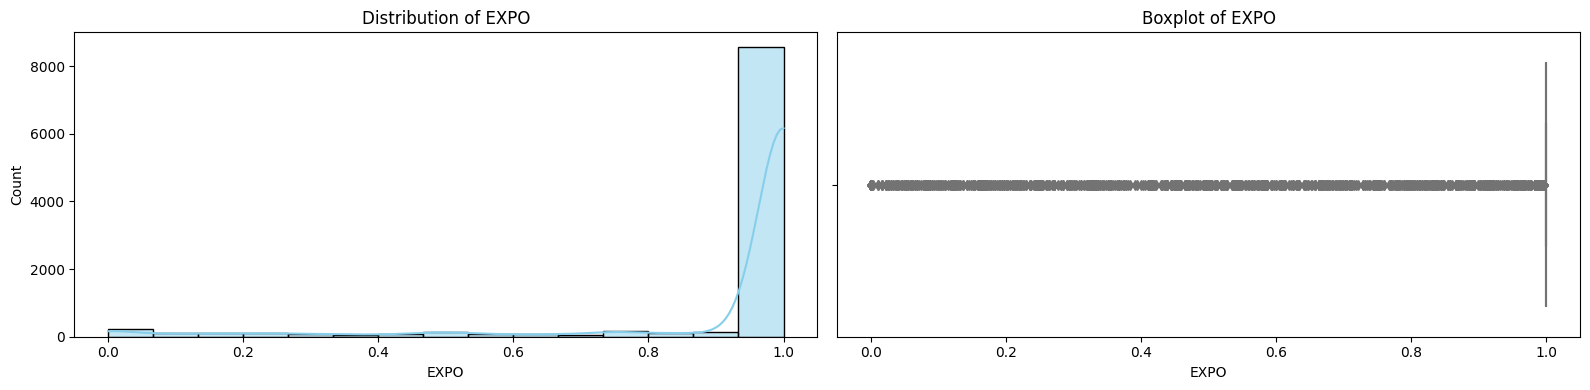

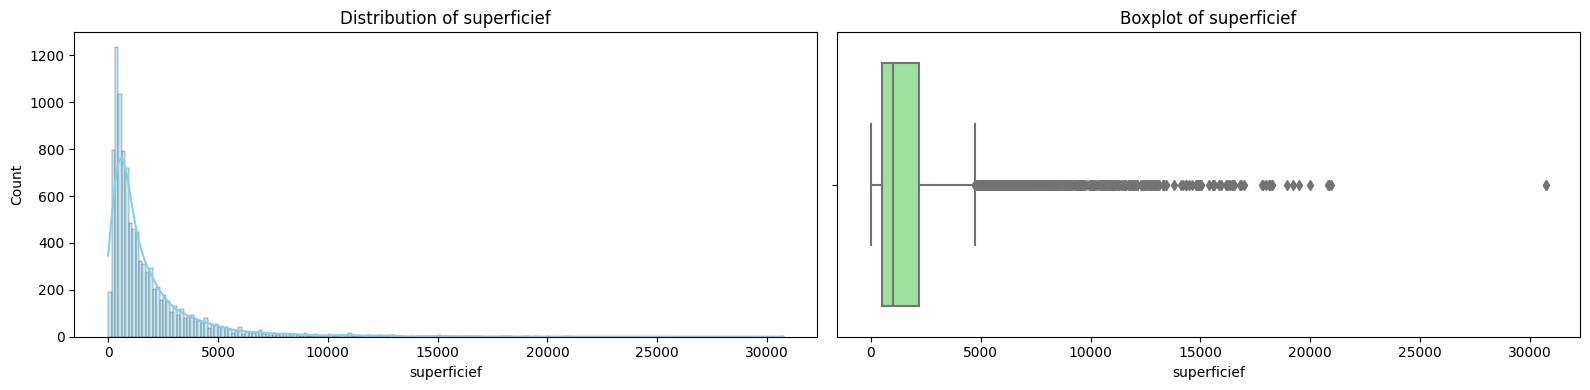

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in nf:
    if feature == 'Insee':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    sns.histplot(df[feature].dropna(), ax=axes[0], color='skyblue', kde=True)
    axes[0].set_title(f'Distribution of {feature}')
    sns.boxplot(x=df[feature], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()


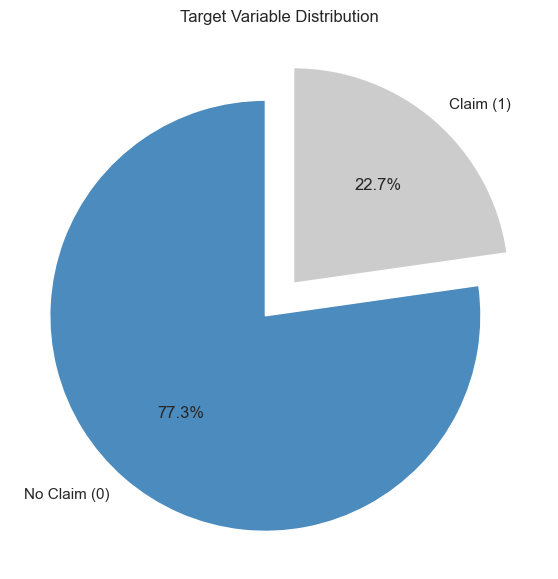

In [ ]:

sns.set()
target_counts = df['target'].value_counts()
labels = ['No Claim (0)', 'Claim (1)']
explode = (0.1, 0.1)
plt.figure(figsize=(7, 7))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode,
        colors = ['#4B8BBE', '#CCCCCC'] 
)
plt.title('Target Variable Distribution')
plt.show()

In [ ]:

# Define a distribution of parameters to sample from
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10)
}

# Initialize the estimator
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Setup cross-validation method
cv = StratifiedKFold(n_splits=5)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=cv, scoring='accuracy', verbose=1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X, y)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


NameError: name 'X' is not defined

In [ ]:
# Assuming 'df' is your DataFrame containing all the data
df.drop('Insee', axis=1, inplace=True)



KeyError: "['Insee'] not found in axis"

In [ ]:
features.remove('Insee')

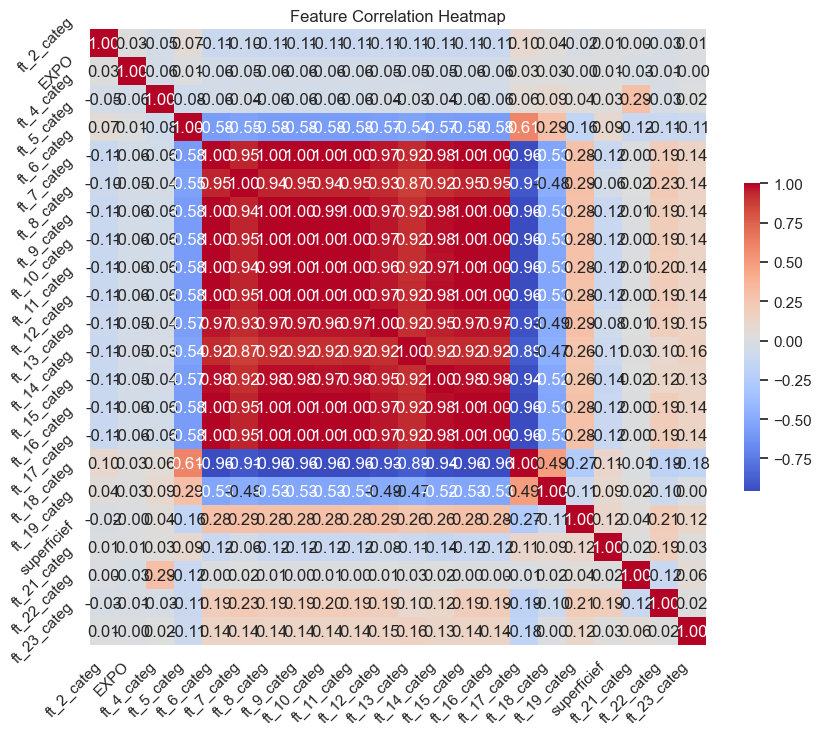

In [57]:

filtered_df = df[features]
corr_matrix = filtered_df.corr()



# Set the size of the figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Adjust the layout for better readability
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.title('Feature Correlation Heatmap')

plt.show()



In [58]:
mask = df.applymap(lambda x: x == '2A004')
print(mask.any())


ft_2_categ     False
EXPO           False
ft_4_categ     False
ft_5_categ     False
ft_6_categ     False
ft_7_categ     False
ft_8_categ     False
ft_9_categ     False
ft_10_categ    False
ft_11_categ    False
ft_12_categ    False
ft_13_categ    False
ft_14_categ    False
ft_15_categ    False
ft_16_categ    False
ft_17_categ    False
ft_18_categ    False
ft_19_categ    False
superficief    False
ft_21_categ    False
ft_22_categ    False
ft_23_categ    False
target         False
dtype: bool


In [63]:
from sklearn.metrics import roc_auc_score

In [64]:

# Split the dataset into features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate the normalized Gini coefficient
normalized_gini = 2 * roc_auc - 1

print(f"Normalized Gini Coefficient: {normalized_gini}")

Normalized Gini Coefficient: 0.3210564139417895
